In [1]:
from zipfile import ZipFile
# Path of ZIP file
f = "/content/drive/MyDrive/Khushi Rawat/Hindi character dtaset.zip"
# Use ZipFile to open and extract the contents of the ZIP file
with ZipFile(f,'r') as zip:
  zip.extractall()

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

In [3]:
# Train and Test Directory
train_dir = '/content/DevanagariHandwrittenCharacterDataset/Train'
test_dir = '/content/DevanagariHandwrittenCharacterDataset/Test'

In [4]:
# Total number of classes in the dataset
classes = os.listdir(train_dir)
print("Length of the list : ",len(classes))
classes

Length of the list :  46


['digit_7',
 'character_31_petchiryakha',
 'character_33_ha',
 'character_14_dhaa',
 'character_9_jha',
 'character_1_ka',
 'character_34_chhya',
 'character_24_bha',
 'character_21_pa',
 'digit_2',
 'character_4_gha',
 'character_30_motosaw',
 'digit_5',
 'character_19_dha',
 'character_11_taamatar',
 'character_16_tabala',
 'character_6_cha',
 'character_13_daa',
 'character_15_adna',
 'digit_0',
 'character_10_yna',
 'character_2_kha',
 'digit_8',
 'character_32_patalosaw',
 'character_5_kna',
 'character_26_yaw',
 'character_7_chha',
 'digit_6',
 'digit_1',
 'character_22_pha',
 'character_28_la',
 'character_27_ra',
 'character_17_tha',
 'digit_3',
 'digit_4',
 'character_23_ba',
 'character_12_thaa',
 'character_8_ja',
 'character_20_na',
 'character_25_ma',
 'character_29_waw',
 'character_3_ga',
 'character_18_da',
 'digit_9',
 'character_35_tra',
 'character_36_gya']

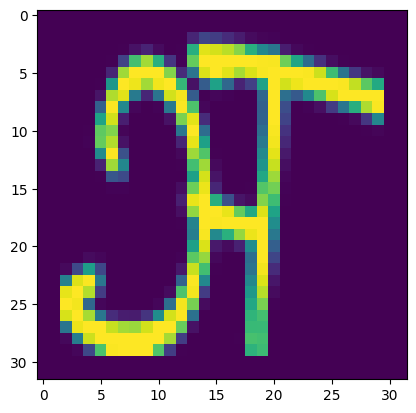

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('/content/DevanagariHandwrittenCharacterDataset/Train/character_10_yna/10542.png')

# Display image
plt.imshow(img)
plt.show()

In [6]:
hindi_character = 'ञ ट ठ ड ढ ण त थ द ध क न प फ ब भ म य र ल व ख श ष स ह ॠ त्र ज्ञ ग घ ङ च छ ज झ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()


In [7]:
# Generating Class label
# The names of each character, in the correct order for the Hindi Devnagari script
class_names='''character_1_ka character_2_kha character_3_ga charajcter_4_gha character_5_kna character_6_cha character_7_chha
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()
print("List of Class Names:")
for class_name in class_names:
    print(class_name)


List of Class Names:
character_1_ka
character_2_kha
character_3_ga
charajcter_4_gha
character_5_kna
character_6_cha
character_7_chha
character_8_ja
character_9_jha
character_10_yna
character_11_taamatar
character_12_thaa
character_13_daa
character_14_dhaa
character_15_adna
character_16_tabala
character_17_tha
character_18_da
character_19_dha
character_20_na
character_21_pa
character_22_pha
character_23_ba
character_24_bha
character_25_ma
character_26_yaw
character_27_ra
character_28_la
character_29_waw
character_30_motosaw
character_31_petchiryakha
character_32_patalosaw
character_33_ha
character_34_chhya
character_35_tra
character_36_gya
digit_0
digit_1
digit_2
digit_3
digit_4
digit_5
digit_6
digit_7
digit_8
digit_9


In [8]:
# Creating Batches for training and testing

#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory=train_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical')

testting_dataset = image_dataset_from_directory(directory=test_dir,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras import layers


model_1 = tf.keras.Sequential([
    # Rescale pixel values
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),

    # Layer 1: Conv + BN + AvgPool
    layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2)),

    # Layer 2: Conv + BN + AvgPool
    layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2)),

    # Flattening
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(120, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Fully Connected Layer 2
    layers.Dense(84, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(len(classes), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile Model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [13]:
# Model taining
model_1_history = model_1.fit(training_dataset,
                              validation_data = testting_dataset,
                        epochs = 8 ,)

Epoch 1/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.6848 - loss: 1.0820 - val_accuracy: 0.9141 - val_loss: 0.2820
Epoch 2/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.8335 - loss: 0.5549 - val_accuracy: 0.9514 - val_loss: 0.1576
Epoch 3/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 87s 36ms/step - accuracy: 0.8721 - loss: 0.4261 - val_accuracy: 0.9618 - val_loss: 0.1265
Epoch 4/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 143s 36ms/step - accuracy: 0.8942 - loss: 0.3526 - val_accuracy: 0.9622 - val_loss: 0.1217
Epoch 5/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 148s 39ms/step - accuracy: 0.9055 - loss: 0.3188 - val_accuracy: 0.9649 - val_loss: 0.1125
Epoch 6/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - accuracy: 0.9135 - loss: 0.2927 - val_accuracy: 0.9676 - val_loss: 0.1073
Epoch 7/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.9193 - loss: 0.2698 - val_accuracy: 0.9720 - val_loss: 0.0922
Epoch 8/8
2444/2444 ━━━━━━━━━━━━━━━━━━━━ 139s 34ms/step - accuracy: 0.9272 - loss

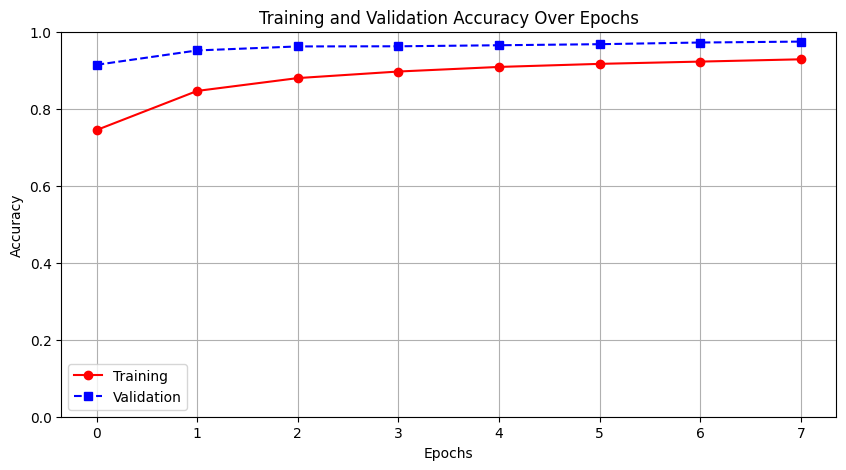

In [14]:
# graph of validation loss and training data accuracy
#x-axis represents the epochs, the y-axis represents the accuracy, and it
# shows both the training and validation accuracy.


import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 5))

# Plot the training accuracy with a red line, solid line style, and circle marker
plt.plot(model_1_history.history['accuracy'], color='red', linestyle='-', marker='o', label='Train')

# Plot the validation accuracy with a blue line, dashed line style, and square marker
plt.plot(model_1_history.history['val_accuracy'], color='blue', linestyle='--', marker='s', label='Validation')

# Set labels for x and y axis
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#set the plot title
plt.title('Training and Validation Accuracy Over Epochs')

# Add grid lines
plt.grid(True)

# Limit y-axis range
plt.ylim(0, 1)

# Add a legend
plt.legend(['Training', 'Validation'])

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Actual_class : छ
Predicted Class :  छ


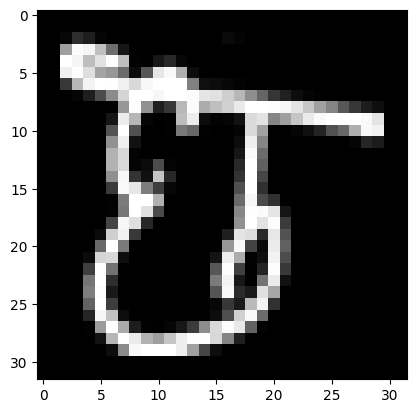

In [15]:

import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_7_chha/12149.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model_1.predict(test_input)
predicted_probability = model_1.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : छ")
print("Predicted Class : " ,hindi_character[class_number])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Actual_class : ख
Predicted Class :  ख


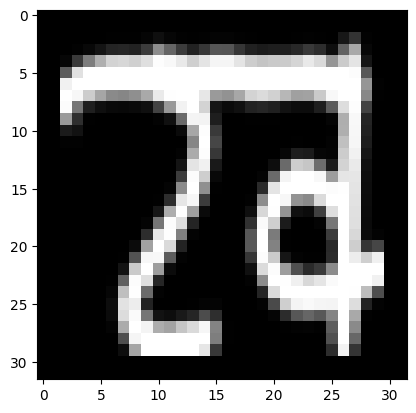

In [17]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/character_2_kha/17739.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model_1.predict(test_input)
predicted_probability = model_1.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : ख")
print("Predicted Class : " ,hindi_character[class_number])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Actual_class : 1
Predicted Class :  १


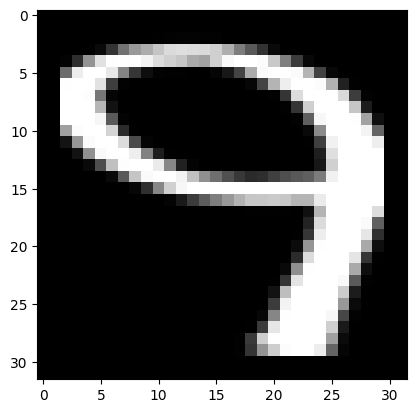

In [16]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread("/content/DevanagariHandwrittenCharacterDataset/Test/digit_1/12415.png")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(32,32))
test_input = test_img.reshape((1,32,32,3))
model_1.predict(test_input)
predicted_probability = model_1.predict(test_input , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)
class_number = predicted_class[0]
print("Actual_class : 1")
print("Predicted Class : " ,hindi_character[class_number])